In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 We begin with importing all the necessary libraries, followed by loading the dataset.

In [197]:
data = pd.read_csv("http://bit.ly/w-data")
data.shape

(25, 2)

In [198]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [199]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We plot a graph to check the frequency of the hours provided in the dataset.

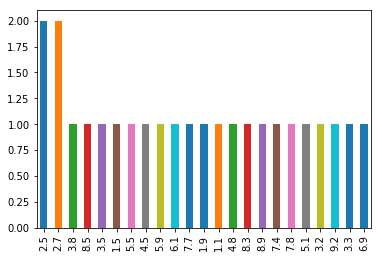

In [200]:
data['Hours'].value_counts().plot(kind='bar');

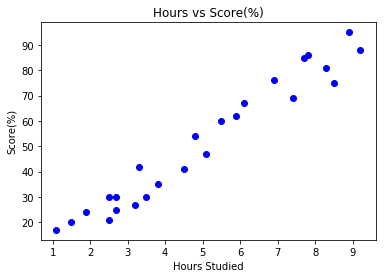

In [201]:
plt.scatter(data['Hours'],data['Scores'],color='blue')
plt.title('Hours vs Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [202]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

We test different methods to split the data and choose the one with maximum acuracy.
1) K-Fold method with n folds

In [203]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
regressor = LinearRegression()
num_instances = len(X)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(regressor, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 61.517% (71.354%)


2)Repeat Random train test splits(10 times)

In [205]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
regressor = LinearRegression()
num_instances = len(X)
seed = 7
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=0.2, random_state=seed)
results = model_selection.cross_val_score(regressor, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 92.689% (2.604%)


3)Split into train and test sets

In [206]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
result = regressor.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 94.549%


Linear regression equation=> y= aX + b
where a= coefficient
      b= intercept

In [207]:
print(regressor.intercept_)

2.018160041434683


In [208]:
print(regressor.coef_)

[9.91065648]


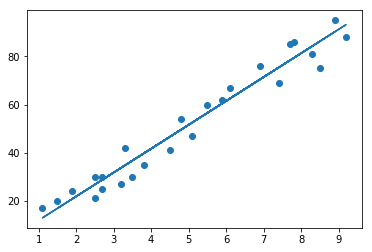

In [209]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [210]:
y_pred = regressor.predict(X_test)

In [211]:
df = pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': y_pred.reshape(-1,)})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We now plot a bar graph to visualise the comparison between the predicted and the actual values

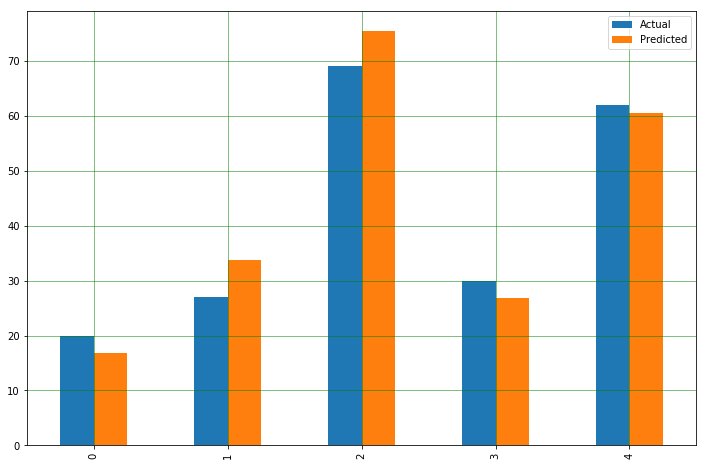

In [212]:
df.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [213]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [223]:
y1=regressor.predict([[9.25]])
print('percentage for 9.25 hours of studying is', y1)
#print('score if student studies for 9.25hrs is ()',format(regressor.predict([hour])))

percentage for 9.25 hours of studying is [93.69173249]


In the following steps we use seaborn to plot the scatter plot and regression plot of the same data to compare the plots with sklearn regression plots.
We also find the Pearson Correlation

In [224]:
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import pearsonr

In [225]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


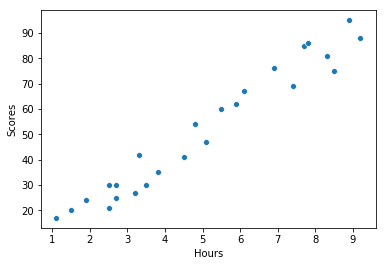

In [226]:
sns.scatterplot(data.Hours,data.Scores)

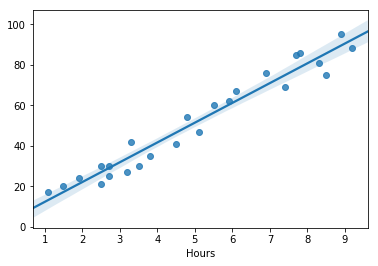

In [232]:
sns.regplot(data.Hours,np.array(data.Scores))

We observe a shift in the linear regression line when compared to the previous plot.

We find the pearson correlation to be high which determines a strong correlation between hours and percentage.

In [233]:
pearson_coef, p_value = stats.pearsonr(data.Scores,data.Hours)
print(pearson_coef)

0.9761906560220887


In [234]:
print(pearsonr(data.Hours,data.Scores))

(0.9761906560220887, 9.132624467459352e-17)


In the next step, we try to find whether the number of hours spent by a student studying affects their marks or not. 
We are trying to find whether there exists a causation.

In [238]:
Ho="The hours spent by a student studying doesnt affect the marks scored"
Ha="The hours spent by a student studying affects the marks scored"
t,p_value=stats.ttest_ind(X,y,axis=0)
if p_value<0.05:
    print(Ha)
else:
    print(Ho)

The hours spent by a student studying affects the marks scored


Lastly we plot the residual plot. If the points are distributed uniformly across the horizontal axis , our model is valid. 

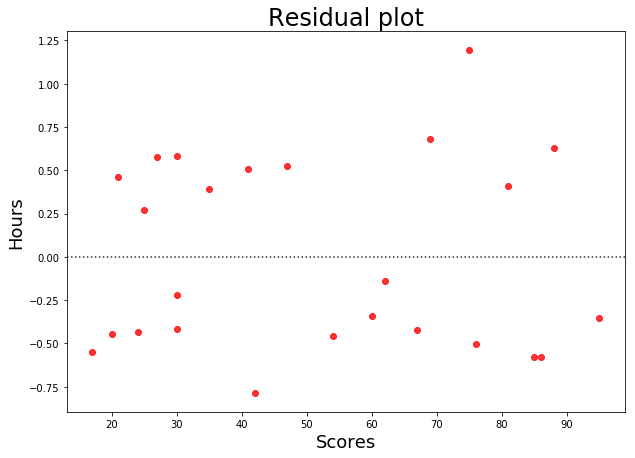

In [231]:
fig = plt.figure(figsize = (10, 7))
sns.residplot(data.Scores,data.Hours, color='Red')
plt.title('Residual plot', size=24)
plt.xlabel('Scores', size=18)
plt.ylabel('Hours', size=18);
